In [1]:
from finn_examples import models
import os
from PIL import Image
import numpy as np
import cv2

# Initialize the Accelerator

In [2]:
accel = models.bincop_cnv()

In [3]:
class_dict = {0: "Correctly Masked", 1: "Incorrectly Worn", 2: "No Mask"}

print("Expected input shape and datatype: %s %s" % (str(accel.ishape_normal), str(accel.idt)))
print("Expected output shape and datatype: %s %s" % (str(accel.oshape_normal), str(accel.odt)))

Expected input shape and datatype: (1, 72, 72, 3) DataType.UINT8
Expected output shape and datatype: (1, 1) DataType.UINT8


# Load Mask Examples

In [4]:
mask_examples_dir = "/tmp/mask_examples"
if not os.path.exists(mask_examples_dir):
    os.makedirs(mask_examples_dir)
    
for i in range(6):
    if "{}.jpg".format(i+1) not in os.listdir(mask_examples_dir):
        os.system("wget -P " + mask_examples_dir + " https://github.com/NaelF/BinaryCoP/raw/master/notebook/pictures/{}.jpg".format(i+1))

# Run Inference

In [5]:
def resize(img):
    img = np.array(img)
    if img.shape[0] != 72 or img.shape[1] != 72:
        resized_img = cv2.resize(img,(72,72))
        return (resized_img)  
    else: return img

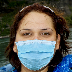

Returned class is: Correctly Masked


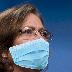

Returned class is: Correctly Masked


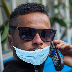

Returned class is: Incorrectly Worn


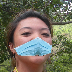

Returned class is: Incorrectly Worn


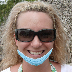

Returned class is: No Mask


In [6]:
im = Image.open(mask_examples_dir + '/1.jpg')
im = resize(im)
accel_in = im.reshape(accel.ishape_normal)
im = Image.fromarray(im, 'RGB')
display(im)
accel_out = accel.execute(accel_in)
print("Returned class is: " + class_dict[int(accel_out)])

im = Image.open(mask_examples_dir + '/2.jpg')
im = resize(im)
accel_in = im.reshape(accel.ishape_normal)
im = Image.fromarray(im, 'RGB')
display(im)
accel_out = accel.execute(accel_in)
print("Returned class is: " + class_dict[int(accel_out)])

im = Image.open(mask_examples_dir + '/3.jpg')
im = resize(im)
accel_in = im.reshape(accel.ishape_normal)
im = Image.fromarray(im, 'RGB')
display(im)
accel_out = accel.execute(accel_in)
print("Returned class is: " + class_dict[int(accel_out)])

im = Image.open(mask_examples_dir + '/4.jpg')
im = resize(im)
accel_in = im.reshape(accel.ishape_normal)
im = Image.fromarray(im, 'RGB')
display(im)
accel_out = accel.execute(accel_in)
print("Returned class is: " + class_dict[int(accel_out)])

im = Image.open(mask_examples_dir + '/5.jpg')
im = resize(im)
accel_in = im.reshape(accel.ishape_normal)
im = Image.fromarray(im, 'RGB')
display(im)
accel_out = accel.execute(accel_in)
print("Returned class is: " + class_dict[int(accel_out)])

# Run Webcam

In [7]:
from IPython.display import clear_output

def producer_live(cap):
    # grab most recent frame in buffer
    for i in range(4):
        cap.grab()
    
    flag, frame = cap.read()

    if flag:
        frame = webcam_rev(frame)
        img = Image.fromarray(frame, 'RGB')
        frame = frame.reshape(accel.ishape_normal)
        return frame, img

    else:
        print ("frame is not ready")
        cv2.waitKey(1)
        
def consumer_live(accel, frame):
    class_out = accel.execute(frame)
    print("Class name: {}".format(class_dict[int(class_out)]))

def webcam_rev(img):
    img = np.array(img)
    img_cropped = img[:, 20:140, :]
    img_resized = cv2.resize(img_cropped,(72,72))
    img_rev = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    return img_rev

In [8]:
cap = cv2.VideoCapture(0)
while not cap.isOpened():
    cap = cv2.VideoCapture(0)
    cv2.waitKey(1)
    print ("Wait for the device")

# set small capture resolution for faster processing
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 160)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 120)

True

# Classify Webcam Input
* Make sure you are in a well-lit environment
* Blue-colored masks are classified best (will be improved in next update)
* Position your face in the center of the frame, close to camera (see examples)

This notebook is a basic proof-of-concept. Model was trained on simple blue-mask augmentation of Flickr-Faces-HQ (FFHQ). For better results, more mask-types can be supported (e.g. https://github.com/aqeelanwar/MaskTheFace)

Class name: Correctly Masked


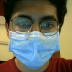

In [9]:
clear_output()
frame, img = producer_live(cap)
consumer_live(accel, frame)
img

Class name: Incorrectly Worn


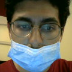

In [10]:
clear_output()
frame, img = producer_live(cap)
consumer_live(accel, frame)
img

Class name: No Mask


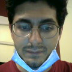

In [11]:
clear_output()
frame, img = producer_live(cap)
consumer_live(accel, frame)
img

# Release Webcam

In [12]:
cap.release()